# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [2]:
import pandas as pd 

In [3]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [4]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [8]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [9]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"}, inplace=True)

In [7]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B,D,G,J,N"
)

In [9]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [10]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]:"구별",
        pop_Seoul.columns[1]:"인구수",
        pop_Seoul.columns[2]:"한국인",
        pop_Seoul.columns[3]:"외국인",
        pop_Seoul.columns[4]:"고령자"
    },
    inplace=True,
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초
- Python에서 R만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

### Series
- index와 value로 이루어져 있음.
- 한 가지 데이터 타입만 가질 수 있음.

In [11]:
import pandas as pd
import numpy as np

In [4]:
pd.Series()

C:\Users\rkgnj\AppData\Local\Temp/ipykernel_65728/2031691219.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [6]:
pd.Series([1,2,3,4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [7]:
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [8]:
pd.Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int32

In [10]:
pd.Series({"key" : "value"})

key    value
dtype: object

In [11]:
pd.Series([1,2,3,4,"5"])

0    1
1    2
2    3
3    4
4    5
dtype: object

In [12]:
data = pd.Series([1,2,3,4,"5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [13]:
data % 2

TypeError: not all arguments converted during string formatting

In [14]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [15]:
data = pd.Series([1,2,3,4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [16]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜 데이터

In [116]:
dates = pd.date_range("20210916", periods=6)
dates

DatetimeIndex(['2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [114]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6,4)
data

array([[-0.78629778, -1.07585335,  0.55704198,  0.6023816 ],
       [ 0.92014594, -1.20272504, -0.90436689,  1.3460917 ],
       [-1.88524924, -0.8811789 ,  0.91953107,  1.09233972],
       [-0.27915891, -0.51604374, -0.64509909, -0.36639139],
       [ 0.15972758,  0.35827261, -0.59877607,  0.61127961],
       [ 0.84703787,  1.22213094, -1.53222774, -0.23962061]])

In [117]:
df = pd.DataFrame(data, index=dates, columns=["A","B","C","D"])
df

,A,B,C,D
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-21,0.847038,1.222131,-1.532228,-0.239621


### 데이터 프레임 정보 탐색

- df.head()

In [25]:
df.head()

,A,B,C,D
2021-09-16,0.181965,-0.875401,-1.353857,-1.613407
2021-09-17,-0.127337,-0.789151,1.476125,0.565959
2021-09-18,1.097038,0.952454,-1.345266,-0.093325
2021-09-19,0.373408,0.766856,-0.985355,0.575708
2021-09-20,-0.187477,0.176754,-1.002583,-0.126099


- df.tail()

In [26]:
df.tail()

,A,B,C,D
2021-09-17,-0.127337,-0.789151,1.476125,0.565959
2021-09-18,1.097038,0.952454,-1.345266,-0.093325
2021-09-19,0.373408,0.766856,-0.985355,0.575708
2021-09-20,-0.187477,0.176754,-1.002583,-0.126099
2021-09-21,1.374354,-0.157384,-0.162417,0.229651


- df.index
여기서 index는 우리가 설정한 변수.

In [28]:
df.index

DatetimeIndex(['2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
df.values

array([[ 0.1819645 , -0.87540073, -1.35385666, -1.61340671],
       [-0.12733653, -0.78915108,  1.47612528,  0.56595948],
       [ 1.09703847,  0.95245439, -1.3452655 , -0.09332531],
       [ 0.37340847,  0.76685584, -0.98535483,  0.57570751],
       [-0.18747672,  0.17675374, -1.00258293, -0.12609921],
       [ 1.37435379, -0.15738396, -0.16241652,  0.22965135]])

- df.info() : 데이터 프레임의 기본 정보 확인

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-09-16 to 2021-09-21
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.451992,0.012355,-0.562225,-0.076919
std,0.646602,0.766736,1.088807,0.811995
min,-0.187477,-0.875401,-1.353857,-1.613407
25%,-0.050011,-0.631209,-1.259595,-0.117906
50%,0.277686,0.009685,-0.993969,0.068163
75%,0.916131,0.619330,-0.368151,0.481882
max,1.374354,0.952454,1.476125,0.575708


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬함.

In [118]:
df

,A,B,C,D
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-21,0.847038,1.222131,-1.532228,-0.239621


In [119]:
df.sort_values(by="B", ascending=False, inplace=True)

In [120]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


### 데이터 선택★★★

In [121]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


In [41]:
# 한 개 컬럼 선택
df["A"]

2021-09-18    1.097038
2021-09-19    0.373408
2021-09-20   -0.187477
2021-09-21    1.374354
2021-09-17   -0.127337
2021-09-16    0.181965
Name: A, dtype: float64

In [122]:
type(df["A"])

pandas.core.series.Series

In [123]:
df.A

2021-09-21    0.847038
2021-09-20    0.159728
2021-09-19   -0.279159
2021-09-18   -1.885249
2021-09-16   -0.786298
2021-09-17    0.920146
Name: A, dtype: float64

In [126]:
# 두 개 이상 컬럼 선택
df[["A","C"]]

,A,C
2021-09-21,0.847038,-1.532228
2021-09-20,0.159728,-0.598776
2021-09-19,-0.279159,-0.645099
2021-09-18,-1.885249,0.919531
2021-09-16,-0.786298,0.557042
2021-09-17,0.920146,-0.904367


### offset index
- [n:m] : n부터 m-1 까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함함.

In [130]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


In [131]:
df[0:3]

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391


In [132]:
df["20210918":"20210920"]

,A,B,C,D
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340


- loc : location
- index ★이름★으로 특정 행, 열을 선택함.    

In [133]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


In [138]:
df.loc[:, ["A","C"]]

,A,C
2021-09-21,0.847038,-1.532228
2021-09-20,0.159728,-0.598776
2021-09-19,-0.279159,-0.645099
2021-09-18,-1.885249,0.919531
2021-09-16,-0.786298,0.557042
2021-09-17,0.920146,-0.904367


In [55]:
df.loc["20210918":"20210920", ["A","C"]]

,A,C
2021-09-18,1.097038,-1.345266
2021-09-19,0.373408,-0.985355
2021-09-20,-0.187477,-1.002583


In [56]:
df.loc["20210919", ["A","C"]]

,A,C
2021-09-19,0.373408,-0.985355


- iloc : inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [57]:
df

,A,B,C,D
2021-09-18,1.097038,0.952454,-1.345266,-0.093325
2021-09-19,0.373408,0.766856,-0.985355,0.575708
2021-09-20,-0.187477,0.176754,-1.002583,-0.126099
2021-09-21,1.374354,-0.157384,-0.162417,0.229651
2021-09-17,-0.127337,-0.789151,1.476125,0.565959
2021-09-16,0.181965,-0.875401,-1.353857,-1.613407


In [58]:
# 한 개의 인덱스 선택
df.iloc[3]

A    1.374354
B   -0.157384
C   -0.162417
D    0.229651
Name: 2021-09-21 00:00:00, dtype: float64

In [59]:
df.iloc[3,2]

-0.1624165218408092

In [60]:
df.iloc[0:3, 1:3]

,B,C
2021-09-18,0.952454,-1.345266
2021-09-19,0.766856,-0.985355
2021-09-20,0.176754,-1.002583


In [61]:
df.iloc[[1,2,4], [2,3]]

,C,D
2021-09-19,-0.985355,0.575708
2021-09-20,-1.002583,-0.126099
2021-09-17,1.476125,0.565959


In [62]:
df.iloc[:, 1:3]

,B,C
2021-09-18,0.952454,-1.345266
2021-09-19,0.766856,-0.985355
2021-09-20,0.176754,-1.002583
2021-09-21,-0.157384,-0.162417
2021-09-17,-0.789151,1.476125
2021-09-16,-0.875401,-1.353857


### condition

In [63]:
df

,A,B,C,D
2021-09-18,1.097038,0.952454,-1.345266,-0.093325
2021-09-19,0.373408,0.766856,-0.985355,0.575708
2021-09-20,-0.187477,0.176754,-1.002583,-0.126099
2021-09-21,1.374354,-0.157384,-0.162417,0.229651
2021-09-17,-0.127337,-0.789151,1.476125,0.565959
2021-09-16,0.181965,-0.875401,-1.353857,-1.613407


In [64]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택

df["A"]>0

2021-09-18     True
2021-09-19     True
2021-09-20    False
2021-09-21     True
2021-09-17    False
2021-09-16     True
Name: A, dtype: bool

In [66]:
# 전체 데이터프레임에서 A컬럼이 0보다 큰 값을 보여줌.

df[df["A"]>0]

,A,B,C,D
2021-09-18,1.097038,0.952454,-1.345266,-0.093325
2021-09-19,0.373408,0.766856,-0.985355,0.575708
2021-09-21,1.374354,-0.157384,-0.162417,0.229651
2021-09-16,0.181965,-0.875401,-1.353857,-1.613407


In [67]:
df[df>0]

,A,B,C,D
2021-09-18,1.097038,0.952454,NaN,NaN
2021-09-19,0.373408,0.766856,NaN,0.575708
2021-09-20,NaN,0.176754,NaN,NaN
2021-09-21,1.374354,NaN,NaN,0.229651
2021-09-17,NaN,NaN,1.476125,0.565959
2021-09-16,0.181965,NaN,NaN,NaN


- NaN : not a number

### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [141]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


In [142]:
df["E"]=["one","two","three","four","five","six"]

In [143]:
df

,A,B,C,D,E
2021-09-21,0.847038,1.222131,-1.532228,-0.239621,one
2021-09-20,0.159728,0.358273,-0.598776,0.611280,two
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391,three
2021-09-18,-1.885249,-0.881179,0.919531,1.092340,four
2021-09-16,-0.786298,-1.075853,0.557042,0.602382,five
2021-09-17,0.920146,-1.202725,-0.904367,1.346092,six


- isin()
- 특정 요소가 있는지 확인

In [144]:
df["E"].isin(["two", "five"])

2021-09-21    False
2021-09-20     True
2021-09-19    False
2021-09-18    False
2021-09-16     True
2021-09-17    False
Name: E, dtype: bool

In [145]:
df[df["E"].isin(["two", "five"])]

,A,B,C,D,E
2021-09-20,0.159728,0.358273,-0.598776,0.611280,two
2021-09-16,-0.786298,-1.075853,0.557042,0.602382,five


### 특정 컬럼 제거
- del
- drop()

In [146]:
del df["E"]
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340
2021-09-16,-0.786298,-1.075853,0.557042,0.602382
2021-09-17,0.920146,-1.202725,-0.904367,1.346092


In [147]:
df.drop(["C","D"], axis=1)  # axis=0 가로, axis=1 세로

,A,B
2021-09-21,0.847038,1.222131
2021-09-20,0.159728,0.358273
2021-09-19,-0.279159,-0.516044
2021-09-18,-1.885249,-0.881179
2021-09-16,-0.786298,-1.075853
2021-09-17,0.920146,-1.202725


In [152]:
df.drop(["20210916","20210917"], axis=0, inplace=True)

KeyError: "['20210916' '20210917'] not found in axis"

In [153]:
df

,A,B,C,D
2021-09-21,0.847038,1.222131,-1.532228,-0.239621
2021-09-20,0.159728,0.358273,-0.598776,0.611280
2021-09-19,-0.279159,-0.516044,-0.645099,-0.366391
2021-09-18,-1.885249,-0.881179,0.919531,1.092340


### apply()

In [97]:
df

,A,B,C
2021-09-18,1.097038,0.952454,-1.345266
2021-09-19,0.373408,0.766856,-0.985355
2021-09-20,-0.187477,0.176754,-1.002583
2021-09-21,1.374354,-0.157384,-0.162417
2021-09-17,-0.127337,-0.789151,1.476125


In [99]:
df["A"].apply("sum")

2.529987482968771

In [100]:
df["C"].apply("mean")

-0.40389890210700674

In [102]:
df[["A","C"]].apply("max")

A    1.374354
C    1.476125
dtype: float64

In [103]:
df["A"].apply(np.sum)

2021-09-18    1.097038
2021-09-19    0.373408
2021-09-20   -0.187477
2021-09-21    1.374354
2021-09-17   -0.127337
Name: A, dtype: float64

In [104]:
df.apply(np.sum)

A    2.529987
B    0.949529
C   -2.019495
dtype: float64

In [105]:
df["A"].apply(lambda num: "Plus" if num > 0 else "Minus")

2021-09-18     Plus
2021-09-19     Plus
2021-09-20    Minus
2021-09-21     Plus
2021-09-17    Minus
Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [12]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [13]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [112]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [113]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [14]:
CCTV_Seoul["최근증가율"]=(
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
    
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374
5,광진구,878,573,78,53,174,53.228621
14,서초구,2297,1406,157,336,398,63.371266


## 3. 인구현황 데이터 훓어보기

In [15]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [16]:
pop_Seoul.drop([0], axis=0, inplace = True)

In [17]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [129]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [131]:
len(pop_Seoul["구별"].unique())

25

In [18]:
# 외국인비율, 고령자비율 컬럼 추가

pop_Seoul["외국인비율"]=pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"]=pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [19]:
pop_Seoul.sort_values(["인구수"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [20]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


## 4. 두 데이터 합치기
---

Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [ ]:
pd.merge(left, right)

In [5]:
# 딕셔너리 안의 리스트 형태

left = pd.DataFrame({
    "key" : ["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [11]:
# 리스트 안의 딕셔너리 형태

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()

- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 함
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 함

In [15]:
pd.merge(left, right, how='inner', on="key")   # 교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [13]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [14]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [16]:
pd.merge(left, right, how='outer', on="key")    # 합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [21]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [22]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [23]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제

- del
- drop()

In [24]:
del data_result["2013년도 이전"]

In [25]:
del data_result["2014년"]

In [26]:
data_result.drop(["2015년","2016년"], axis=1, inplace = True)

In [45]:
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [27]:
data_result.set_index("구별", inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- 상관계수가 0.2이상인 데이터를 비교

In [28]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [49]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [29]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [30]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


---

### matplotlib 기초

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
# matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

matplotlib 그래프 기본 형태

- plt.figure(figsize=(10,6))
- plt.plot(x, y)
- plt.show()



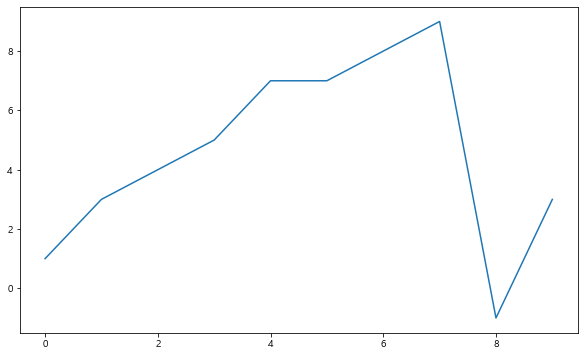

In [39]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9],[1,3,4,5,7,7,8,9,-1,3])
plt.show()

### 예제1 : 그래프 기초

In [40]:
import numpy as np

t= np.arange(0,12,0.01)
y = np.sin(t)

C:\Anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


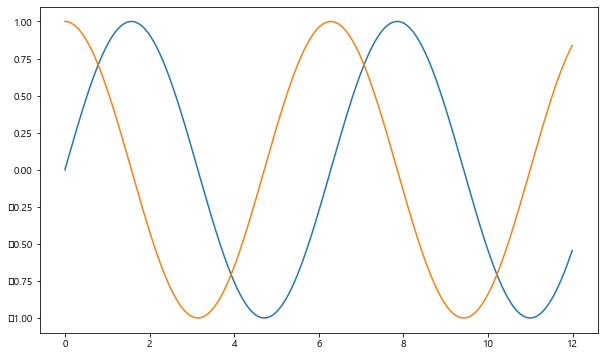

In [42]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파랑색 선 데이터 의미 구분

C:\Anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


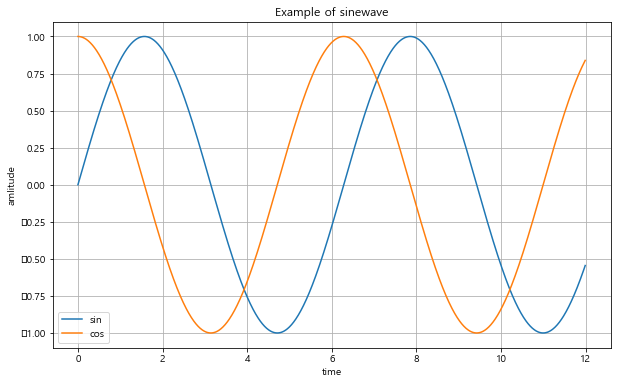

In [49]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid(True)
plt.title("Example of sinewave")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(labels=["sin","cos"], loc="lower left")
plt.show()

### 예제2 : 그래프 커스텀

In [53]:
t= np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

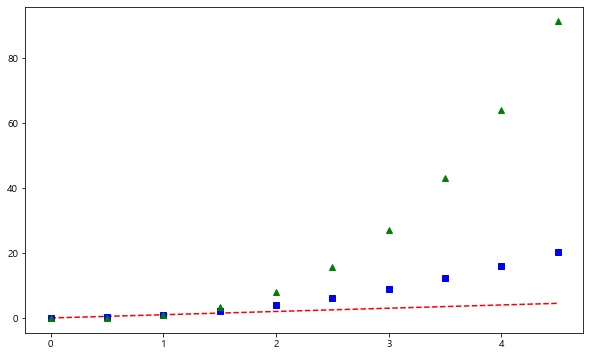

In [56]:
plt.figure(figsize=(10,6))
plt.plot(t, t, "r--")    # red ----
plt.plot(t, t**2, "bs")  # blue square
plt.plot(t, t**3, "g^")  # green triangle
plt.show()

In [60]:
t = np.arange(0, 7)
y = [3,4,9,1,4,2,6]

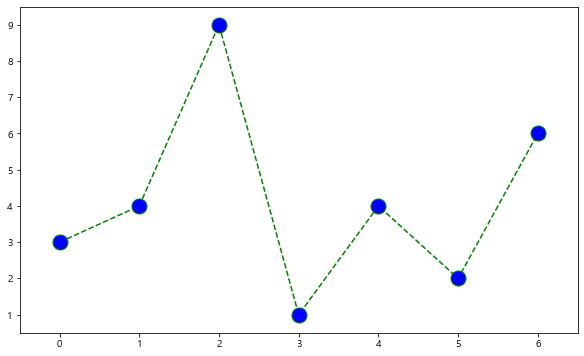

In [63]:
def drawGraph():

    plt.figure(figsize=(10,6))
    plt.plot(
        t,
        y,
        color='green',
        linestyle='dashed',
        marker='o',
        markerfacecolor='blue',
        markersize=15,

    )
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()
    
drawGraph()

### 예제3 : scatter plot

In [66]:
t = np.array(range(0,10))
y = np.array([3,4,5,6,7,8,2,3,9,5])

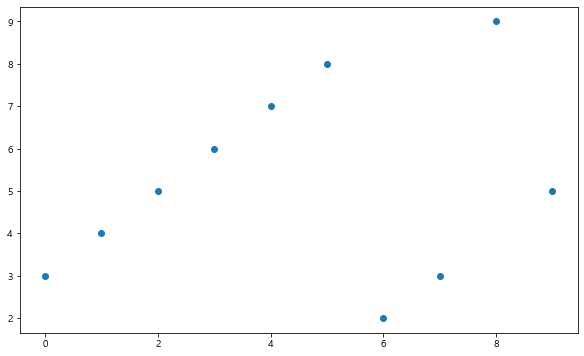

In [68]:
def drawGraph():

    plt.figure(figsize=(10,6))
    plt.scatter(t,y)
    plt.show()

drawGraph()

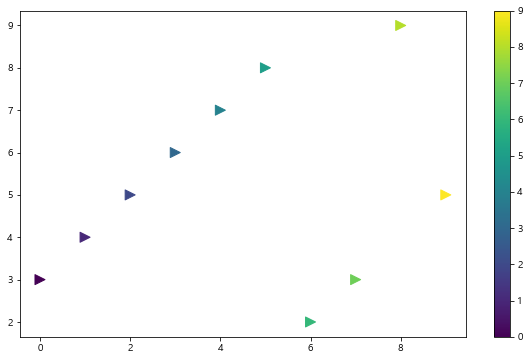

In [71]:
colormap = t

def drawGraph():

    plt.figure(figsize=(10,6))
    plt.scatter(t, y, s=100, c=colormap, marker='>')
    plt.colorbar()
    plt.show()

drawGraph()


### 예제4 : pandas에서 plot 그리기
- matplotlib을 가져와서 사용함

In [72]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

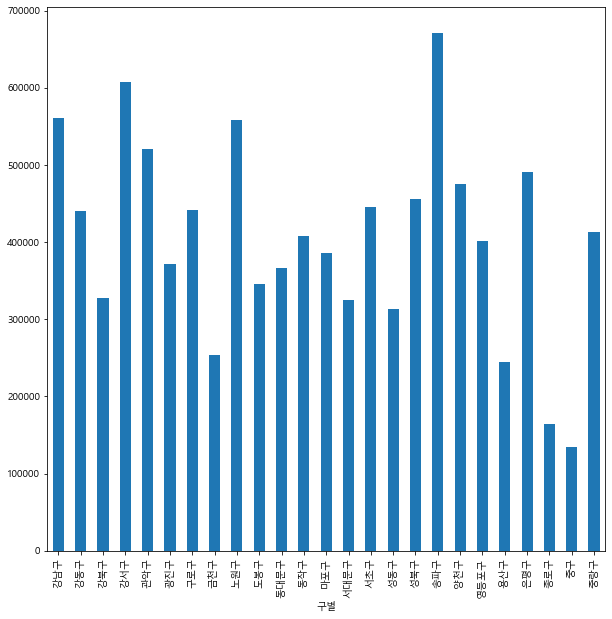

In [73]:
data_result["인구수"].plot(kind="bar", figsize=(10,10))

<AxesSubplot:ylabel='구별'>

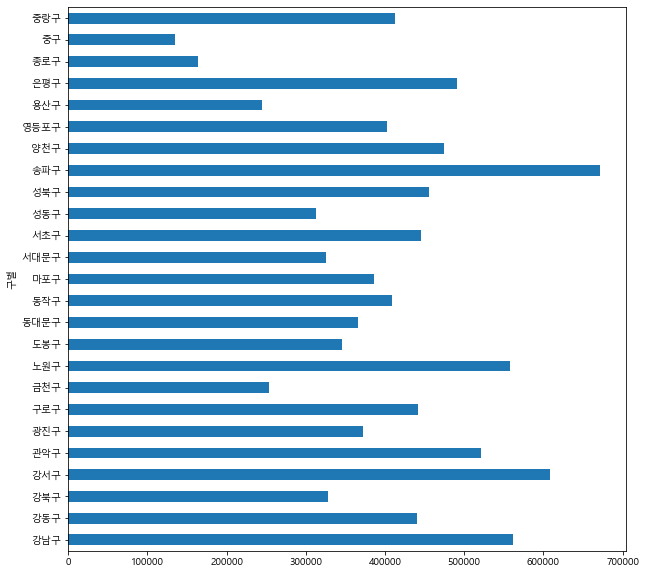

In [74]:
data_result["인구수"].plot(kind="barh", figsize=(10,10))

---

## 5. 데이터 시각화

In [75]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc('font', family='Malgun Gothic')
get_ipython().run_line_magic('matplotlib', 'inline')

In [76]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

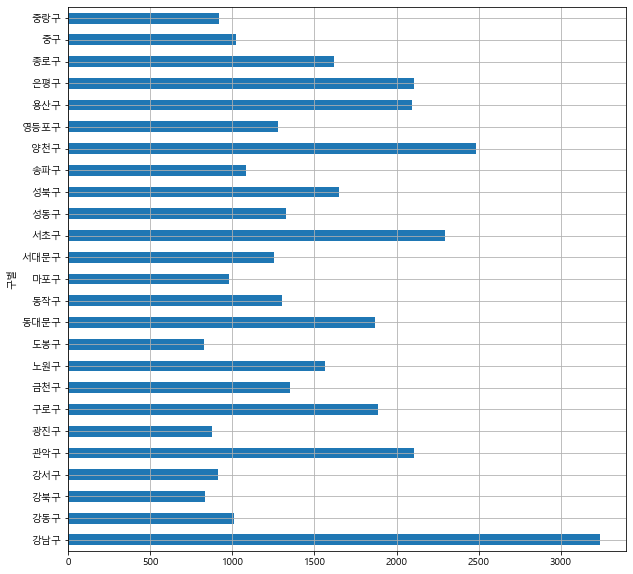

In [78]:
data_result["소계"].plot(kind='barh', grid=True, figsize=(10,10));

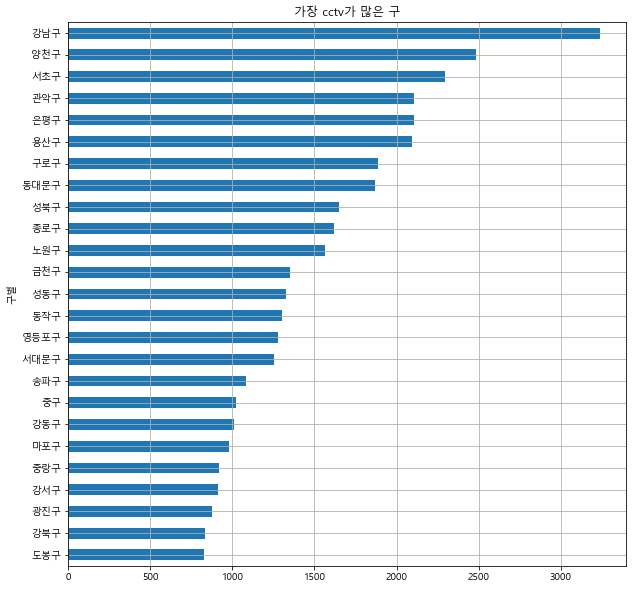

In [81]:
def drawGraph():

    data_result["소계"].sort_values().plot(
        kind='barh', grid=True,  title="가장 cctv가 많은 구", figsize=(10,10));
    
drawGraph()

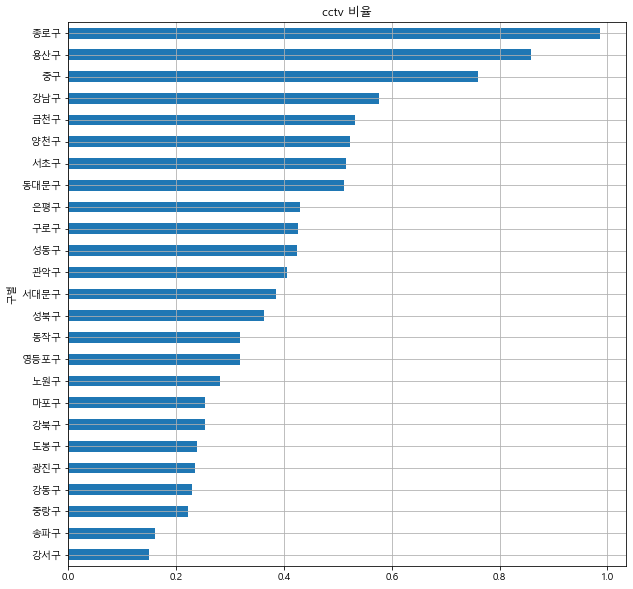

In [82]:
def drawGraph():

    data_result["CCTV비율"].sort_values().plot(
        kind='barh', grid=True,  title="cctv 비율", figsize=(10,10));
    
drawGraph()

## 6. 데이터의 경향 표시

In [84]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

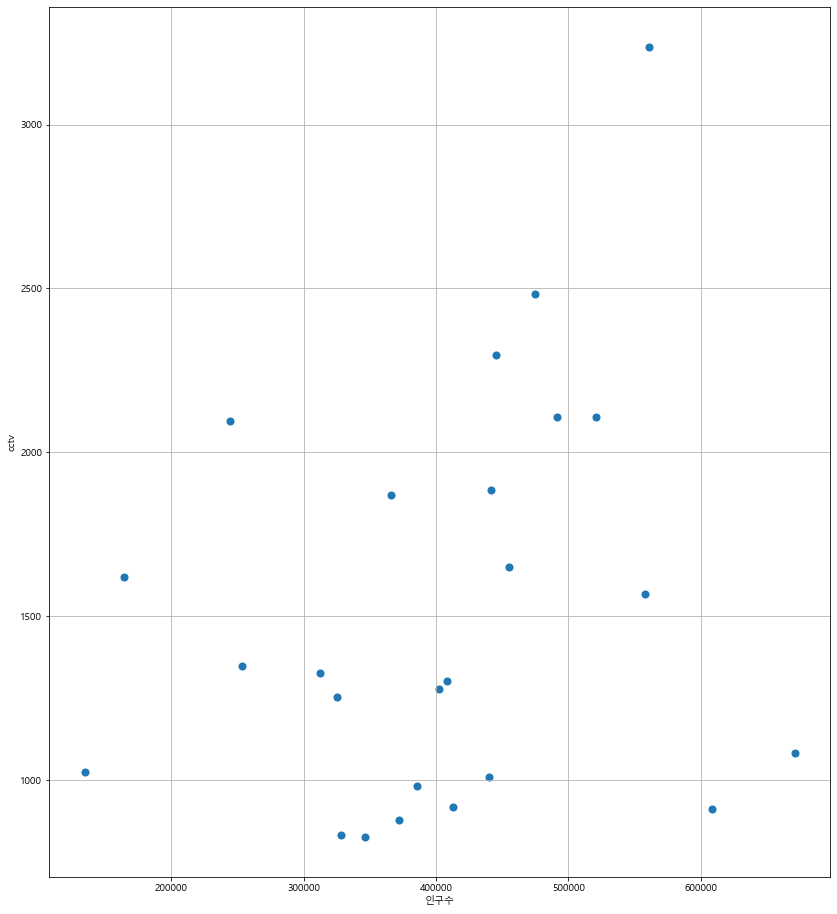

In [85]:
def drawGraph():
    
    plt.figure(figsize=(14,16))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('cctv')
    plt.grid()
    plt.show()
    
drawGraph()

#### numpy를 이용한 1차 직선 만들기
- np.polyfit() : 직선을 구성하기 위한 계수를 계산
- np.ploy1d() : polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [86]:
import numpy as np

In [88]:
fd1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fd1

array([1.11155868e-03, 1.06515745e+03])

In [90]:
f1 = np.poly1d(fd1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [91]:
f1(400000)

1509.780925241333

- 인구가 40만명 구에서 서울시의 전체 경향에 맞는 적당한 cctv 개수는?

In [93]:
fx = np.linspace(100000,700000,100)

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a, b, c) : a 부터 b까지 c개의 등간격 데이터 생성

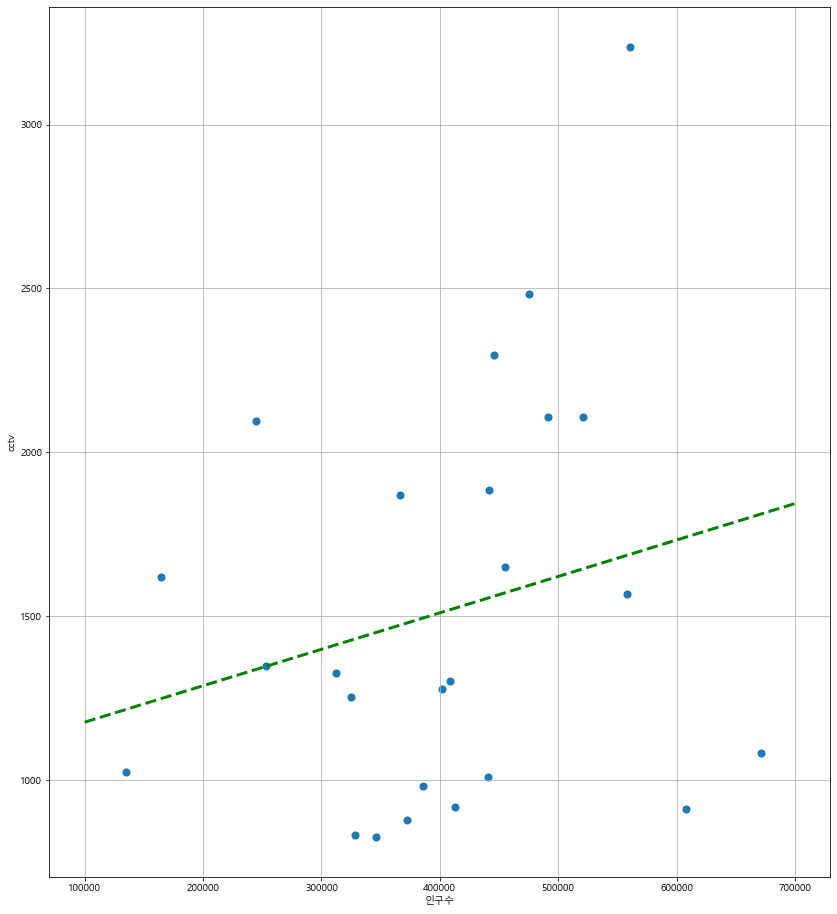

In [94]:
def drawGraph():
    
    plt.figure(figsize=(14,16))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='green')
    plt.xlabel('인구수')
    plt.ylabel('cctv')
    plt.grid()
    plt.show()
    
drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

## 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [95]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [96]:
data_result["오차"] = data_result["소계"]-f1(data_result["인구수"])


In [97]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [98]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False)
df_sort_t = data_result.sort_values(by="오차", ascending=True)

In [99]:
# 경향 대비 cctv를 많이 가진 구

df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [100]:
# 경향 대비 cctv를 적게 가진 구

df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [101]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의로 세팅
color_step = ["#e74c3c","#e79d3c","#e79d3c","#3c53e7","#533ce7","#e73c7e"]
my_cmap = ListedColormap(color_step)

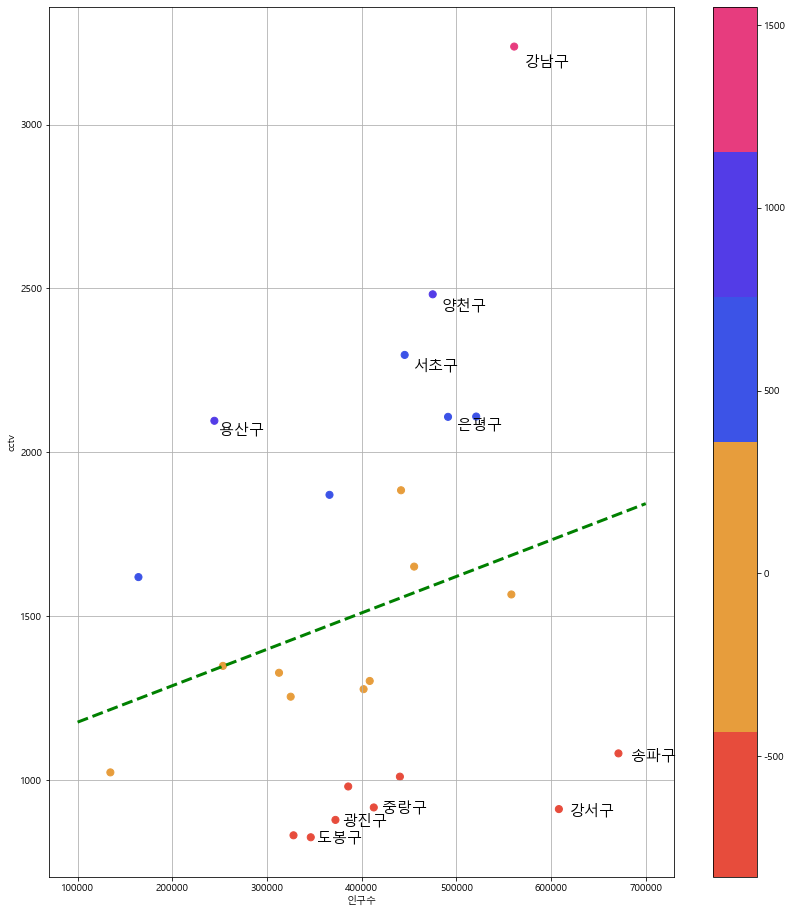

In [107]:
def drawGraph():
    
    plt.figure(figsize=(14,16))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='green')
    
    for n in range(5):
    #상위 5개 
        plt.text(
            df_sort_f["인구수"][n] *1.02,   # x 좌표
            df_sort_f["소계"][n] *0.98,     # y 좌표
            df_sort_f.index[n],
            fontsize = 15
        )
    
    
    #하위 5개
        plt.text(
            df_sort_t["인구수"][n] *1.02,   # x 좌표
            df_sort_t["소계"][n] *0.98,     # y 좌표
            df_sort_t.index[n],
            fontsize = 15
        )
    
    
    
    plt.xlabel('인구수')
    plt.ylabel('cctv')
    plt.grid()
    plt.colorbar()
    plt.show()
    
drawGraph()

In [110]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")